# Lab | Cleaning numerical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder.

# Context

An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

# Some business Objectives:

- Retain customers,
- Analyze relevant customer data,
- Develop focused customer retention programs.
- Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

## Data Analysis Process
#### Remember the process:

- **Case Study**
- **Get data**
- **Cleaning/Wrangling/EDA**
- Processing Data
- Modeling
 -Validation
- Reporting


# Instructions

1. Import the necessary libraries.

2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

3. First look at its main features (head, shape, info). **NOTE**   The target column is _total_claim_amount_

4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

5. Change effective to date column to datetime format.

6. Create a NEW dataframe using only the numerical data called _numerical_df_.  **Use this for the following questions**.

6. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

7. Plot a correlation matrix, comment what you see.

8. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

9. Comment what you can see in the plots.

10. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

11. Did you find outliers? Comment what you will do with them.  If you decide to remove them, do that now. Also, remove them from your **main** dataframe.

12. Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

13. Save the numerical_df to csv as numerical.csv   You will use this file again this week.


In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from scipy.stats import norm, expon, probplot

In [2]:
# Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
pd.set_option('display.max_columns',None)
customer_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
# First look at its main features (head, shape, info). NOTE The target column is total_claim_amount
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
# Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)
def rename_columns(df):
    new_col = np.where(df.columns.str.contains(' '),df.columns.str.lower().str.replace(' ','_'),df.columns.str.lower())
    df.columns = new_col
rename_columns(customer_df)

In [7]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [8]:
# Change effective to date column to datetime format
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], format='%m/%d/%y')

In [9]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [10]:
# Create a NEW dataframe using only the numerical data called numerical_df. Use this for the following questions.
numerical_df = customer_df.select_dtypes(np.number)
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [11]:
# Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df
# Here, I chose 5% below of my total dataset are continuous variables and above are discrete varaibles
def differentiate_variables(df):
    cnt_cols = []
    dis_cols = []
    
    for col in df.columns:
        if df[col].nunique() > 9134*0.02: # Threshold for considering a variable as continuous
            cnt_cols.append(col)
        else:
            dis_cols.append(col)
    
    continuous_df = df[cnt_cols]
    discrete_df = df[dis_cols]
    
    return continuous_df, discrete_df

continuous_df, discrete_df = differentiate_variables(numerical_df)

In [12]:
display(continuous_df,discrete_df)

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.519279,56274,69,384.811147
1,6979.535903,0,94,1131.464935
2,12887.431650,48767,108,566.472247
3,7645.861827,0,106,529.881344
4,2813.692575,43836,73,138.130879
...,...,...,...,...
9129,23405.987980,71941,73,198.234764
9130,3096.511217,21604,79,379.200000
9131,8163.890428,0,85,790.784983
9132,7524.442436,21941,96,691.200000


,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,32,5,0,1
1,13,42,0,8
2,18,38,0,2
3,18,65,0,7
4,12,44,0,1
...,...,...,...,...
9129,18,89,0,2
9130,14,28,0,1
9131,9,37,3,2
9132,34,3,0,3


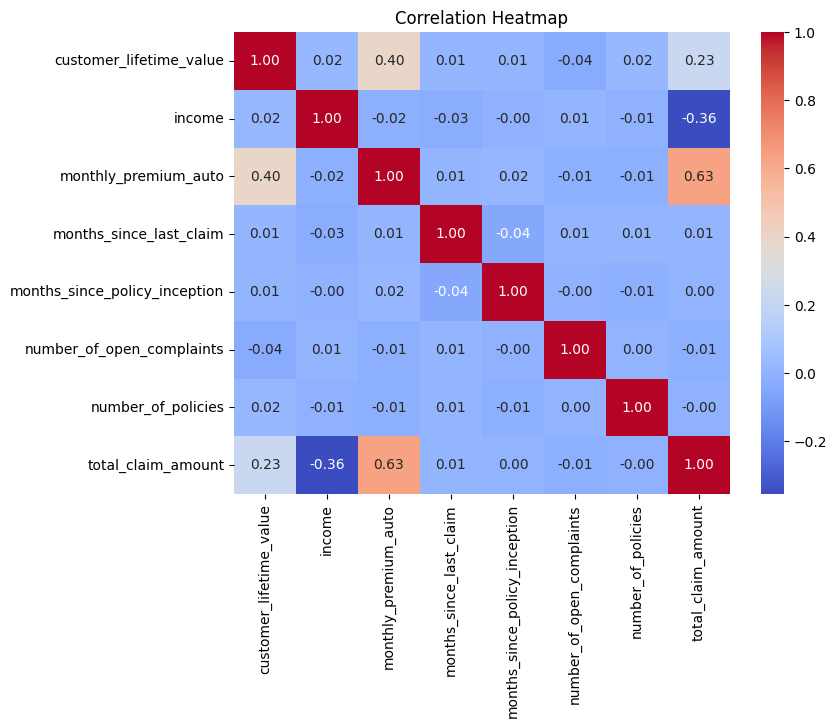

In [13]:
# Plot a correlation matrix, comment what you see.
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,annot = True,cmap='coolwarm',fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

In [14]:
# Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

def plot_discrete_variables(df):
    for col in discrete_df.columns:
        plt.figure(figsize=(8, 6))
        sns.countplot(data=df, x=col)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()
def plot_continuous_variables(df):
    for col in continuous_df.columns:
        plt.figure(figsize=(8, 6))
        sns.histplot(data=df, x=col, kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

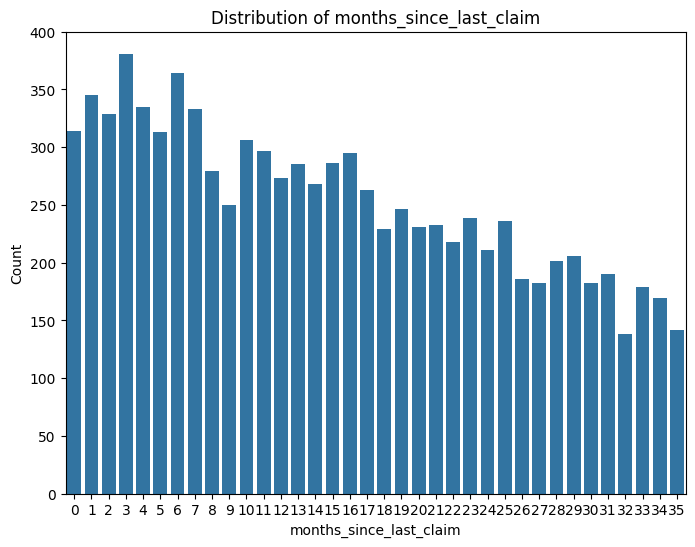

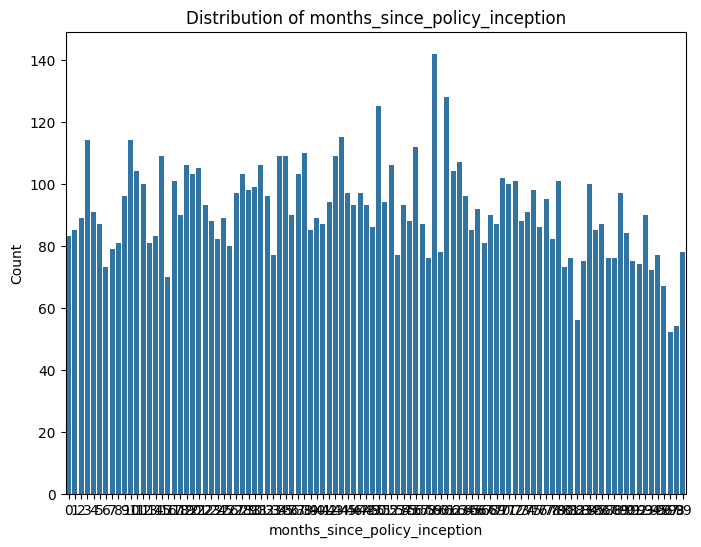

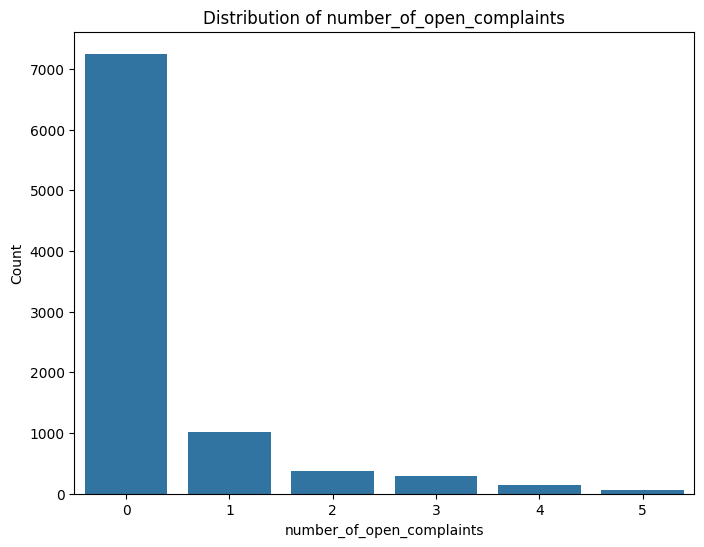

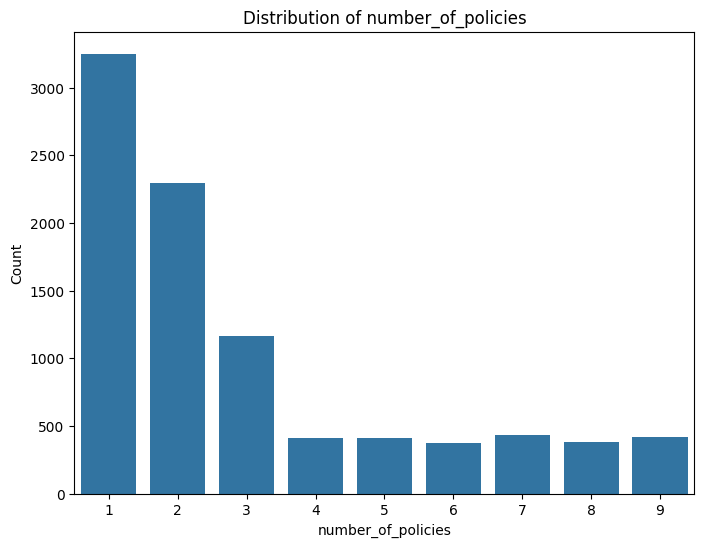

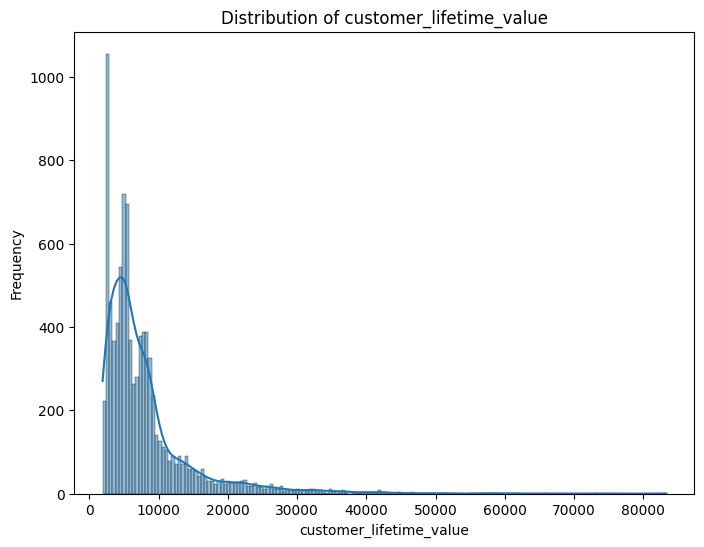

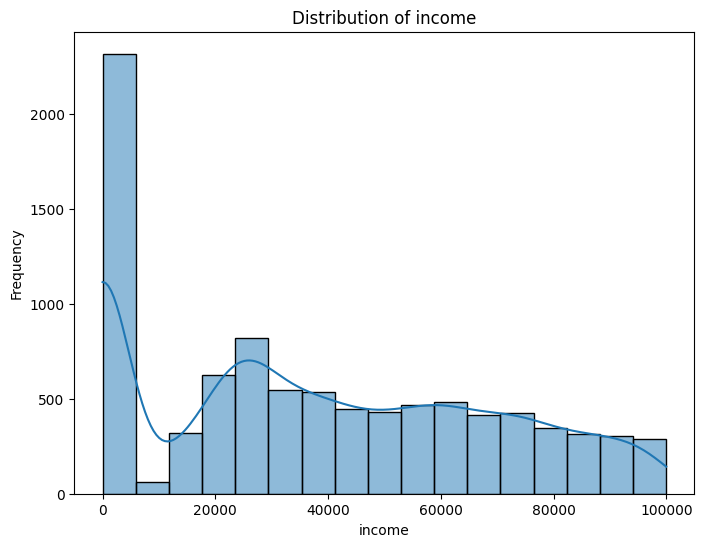

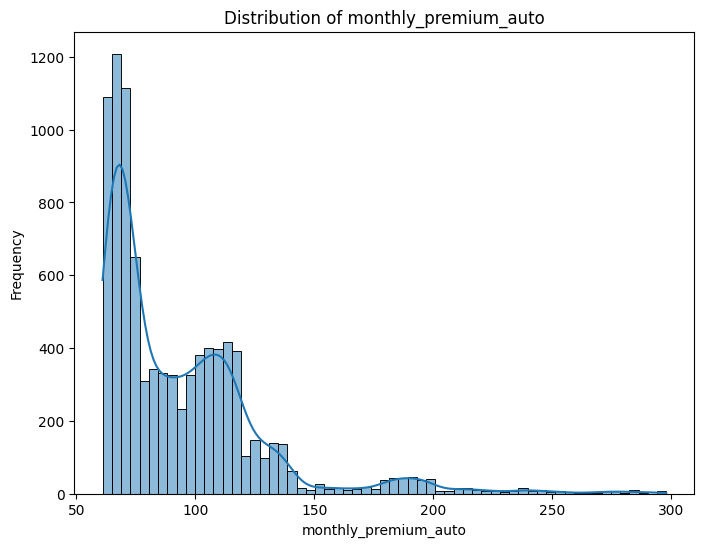

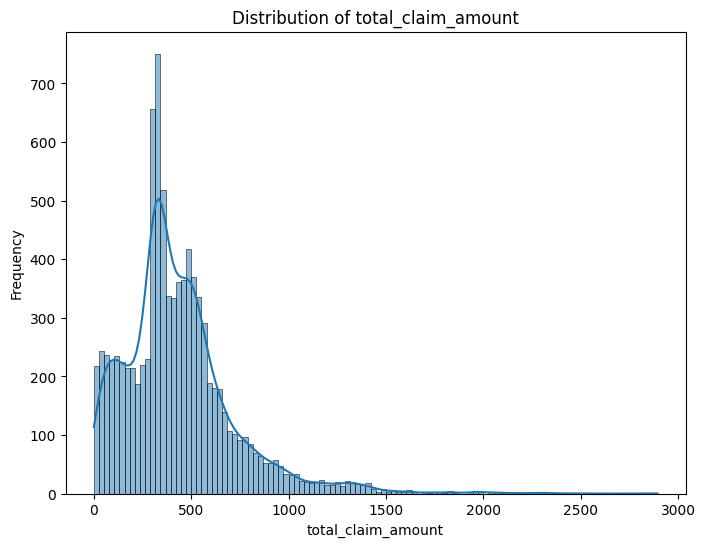

In [15]:
plot_discrete_variables(discrete_df)
plot_continuous_variables(continuous_df)

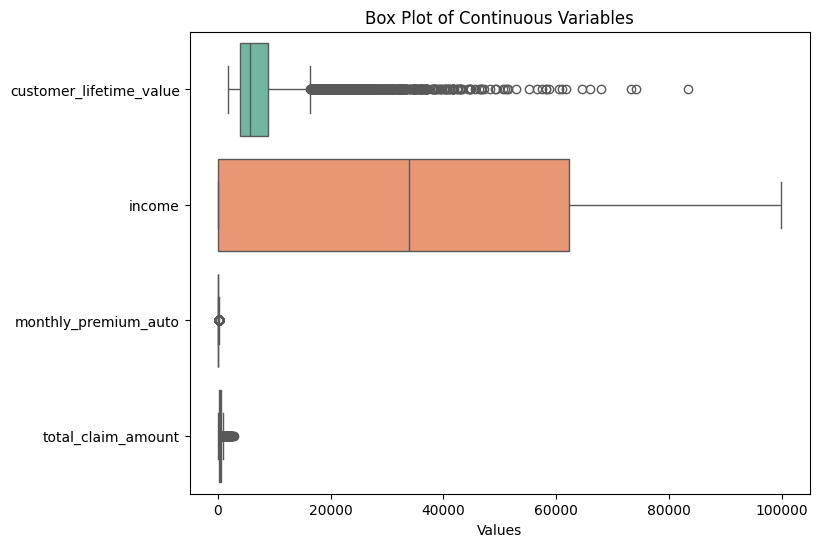

In [16]:
# Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)
plt.figure(figsize=(8,6))
sns.boxplot(data = continuous_df,orient = "h",palette = "Set2")
plt.title('Box Plot of Continuous Variables')
plt.xlabel('Values')
plt.show()

In [17]:
continuous_df.nunique()

customer_lifetime_value    8041
income                     5694
monthly_premium_auto        202
total_claim_amount         5106
dtype: int64

In [18]:
# Did you find outliers? Comment what you will do with them. If you decide to remove them, do that now. Also, remove them from your main dataframe
# Define a function to remove outliers from a column
def remove_outliers(df):
    df_cleaned = df.copy()  # Create a copy of the DataFrame to avoid modifying the original
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df_cleaned.loc[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound), col] = df_cleaned[col]
    return df_cleaned

# Remove outliers from continuous columns
continuous_df = remove_outliers(continuous_df)
customer_df = remove_outliers(customer_df)
display(continuous_df,customer_df)

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.519279,56274,69,384.811147
1,6979.535903,0,94,1131.464935
2,12887.431650,48767,108,566.472247
3,7645.861827,0,106,529.881344
4,2813.692575,43836,73,138.130879
...,...,...,...,...
9129,23405.987980,71941,73,198.234764
9130,3096.511217,21604,79,379.200000
9131,8163.890428,0,85,790.784983
9132,7524.442436,21941,96,691.200000


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [19]:
# Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.
continuous_df.isna().sum()

customer_lifetime_value    0
income                     0
monthly_premium_auto       0
total_claim_amount         0
dtype: int64

In [20]:
# Save the numerical_df to csv as numerical.csv You will use this file again this week.
numerical_df.to_csv('numerical.csv', index=False)

# Cleaning Categorical Data

In [21]:
# ind all of the categorical data. Save it in a categorical_df variable.
categorical_df = customer_df.select_dtypes(include = ['object','datetime64[ns]'])
categorical_df.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [22]:
# Check for NaN values and decide what to do with them, do it now.
categorical_df.isna().sum()

customer             0
state                0
response             0
coverage             0
education            0
effective_to_date    0
employmentstatus     0
gender               0
location_code        0
marital_status       0
policy_type          0
policy               0
renew_offer_type     0
sales_channel        0
vehicle_class        0
vehicle_size         0
dtype: int64

In [23]:
# Check all unique values of columns.
for col in categorical_df.columns:
    print(categorical_df[col].value_counts(dropna = False))
    print( )

customer
BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: count, Length: 9134, dtype: int64

state
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64

response
No     7826
Yes    1308
Name: count, dtype: int64

coverage
Basic       5568
Extended    2742
Premium      824
Name: count, dtype: int64

education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: count, dtype: int64

effective_to_date
2011-01-10    195
2011-01-27    194
2011-02-14    186
2011-01-26    181
2011-01-17    180
2011-01-19    179
2011-01-31    178
2011-01-03    178
2011-01-20    173
2011-02-26    169
2011-01-28    169
2011-02-19    168
2011-01-05    167
2011-02-27    167
2011-01-11    166
2011-02-04    164
2011-02-10    161
2011-02-28    161
2011-01-

In [24]:
# Check dtypes. Do they all make sense as categorical data?
categorical_df.dtypes

customer                     object
state                        object
response                     object
coverage                     object
education                    object
effective_to_date    datetime64[ns]
employmentstatus             object
gender                       object
location_code                object
marital_status               object
policy_type                  object
policy                       object
renew_offer_type             object
sales_channel                object
vehicle_class                object
vehicle_size                 object
dtype: object

In [25]:
# Does any column contain alpha and numeric data? Decide how to clean it and do it now.
categorical_df = categorical_df.drop(['customer'],axis=1)
categorical_df

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,2011-02-03,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [26]:
categorical_df['policy'] = categorical_df['policy'].str.split().str[1:].str.join(' ')
categorical_df

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Married,Personal Auto,L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,Corporate Auto,L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,Corporate Auto,L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,2011-02-03,Employed,M,Suburban,Married,Personal Auto,L2,Offer3,Branch,Four-Door Car,Large


In [27]:
# Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.
[categorical_df[col].value_counts(dropna = False) for col in categorical_df.columns]

[state
 California    3150
 Oregon        2601
 Arizona       1703
 Nevada         882
 Washington     798
 Name: count, dtype: int64,
 response
 No     7826
 Yes    1308
 Name: count, dtype: int64,
 coverage
 Basic       5568
 Extended    2742
 Premium      824
 Name: count, dtype: int64,
 education
 Bachelor                2748
 College                 2681
 High School or Below    2622
 Master                   741
 Doctor                   342
 Name: count, dtype: int64,
 effective_to_date
 2011-01-10    195
 2011-01-27    194
 2011-02-14    186
 2011-01-26    181
 2011-01-17    180
 2011-01-19    179
 2011-01-31    178
 2011-01-03    178
 2011-01-20    173
 2011-02-26    169
 2011-01-28    169
 2011-02-19    168
 2011-01-05    167
 2011-02-27    167
 2011-01-11    166
 2011-02-04    164
 2011-02-10    161
 2011-02-28    161
 2011-01-02    160
 2011-01-21    160
 2011-01-29    160
 2011-02-22    158
 2011-02-05    158
 2011-02-03    158
 2011-02-07    157
 2011-02-12    156
 2011-0

In [28]:
# Save the cleaned catagorical dataframe as categorical.csv You will use this file again this week.
categorical_df.to_csv('categorical.csv',index = False)

## # Lab | Feature extraction

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs. 

## Data Analysis Process
#### Remember the process:

- Case Study
- Get data
- **Cleaning/Wrangling/EDA**
- Processing Data
- Modeling
 -Validation
- Reporting

### Instructions

1. Open the `categorical` dataframe we created before.
2. Plot all the categorical variables with the proper plot. What can you see?
3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?  
    Make any changes you feel are necessary.
4. Plot time variable. Can you extract something from it?
5. The time variable can be useful. You shoud transform its data into a more useful form.
    Hint: Day, week, and month as integers might be useful.


In [29]:
# Open the categorical dataframe we created before.
categorical_df = pd.read_csv('categorical.csv')
categorical_df

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Married,Personal Auto,L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,Corporate Auto,L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,Corporate Auto,L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,2011-02-03,Employed,M,Suburban,Married,Personal Auto,L2,Offer3,Branch,Four-Door Car,Large


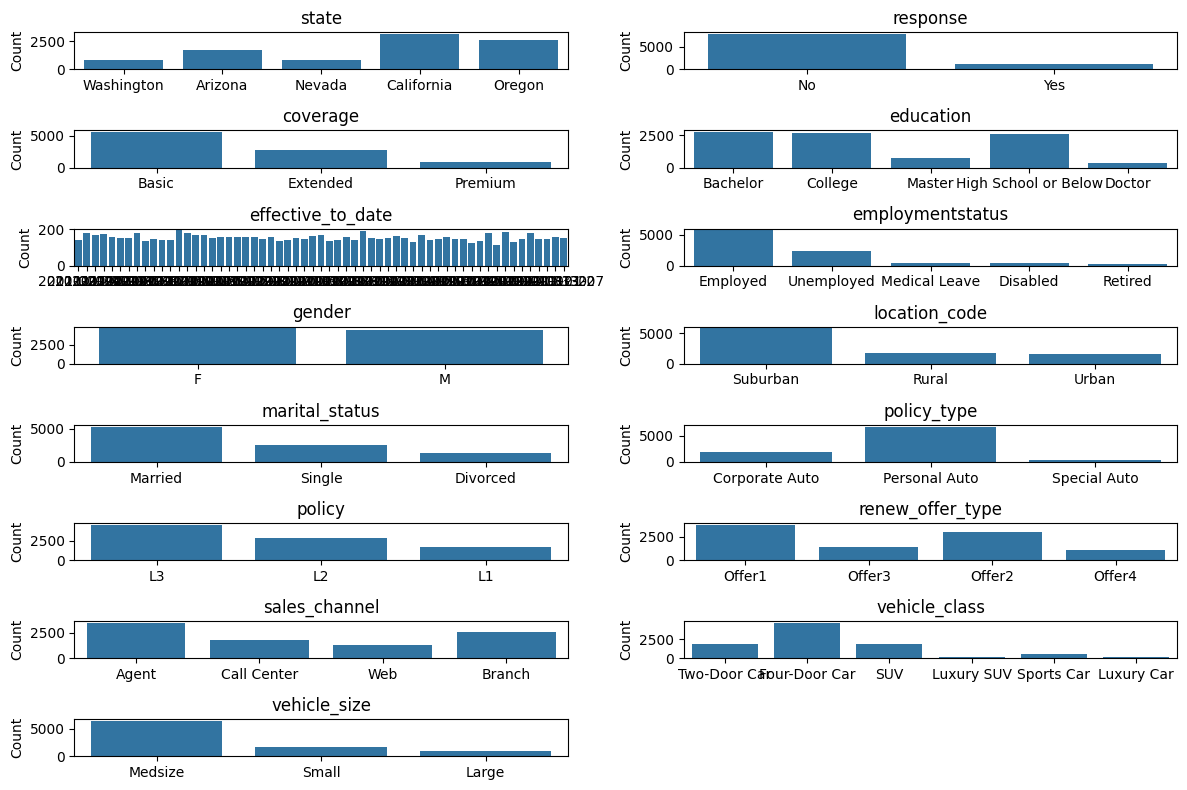

In [30]:
# Plot all the categorical variables with the proper plot. What can you see?
# Set up plot grid
num_plots = len(categorical_df.columns)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten axes if necessary
axes = axes.flatten()

# Iterate over columns and plot
for i, col in enumerate(categorical_df.columns):
    ax = axes[i]
    sns.countplot(data=categorical_df, x=col, ax=ax)
    ax.set_title(col)
    ax.set_xlabel(None)
    ax.set_ylabel('Count')

# Hide unused subplots
for j in range(num_plots, num_cols * num_rows):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

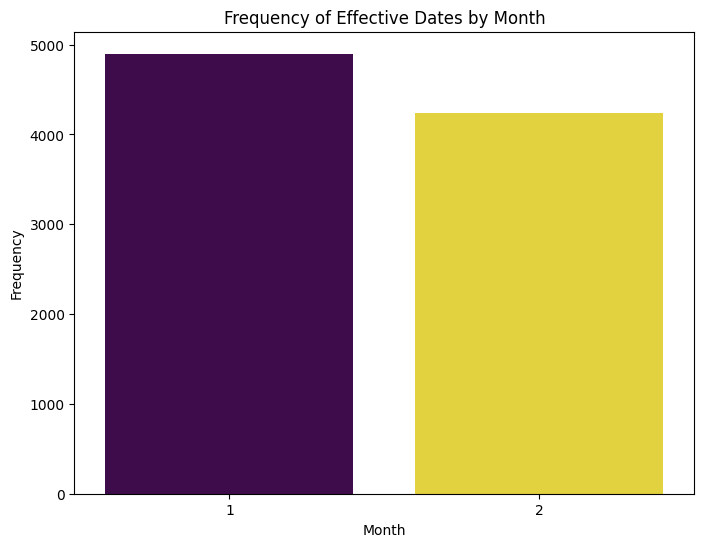

In [31]:
categorical_df['effective_to_date'] = pd.to_datetime(categorical_df['effective_to_date'], errors='coerce')

# Extract day, week, and month as integers
categorical_df['day'] = categorical_df['effective_to_date'].dt.day
categorical_df['week'] = categorical_df['effective_to_date'].dt.isocalendar().week
categorical_df['month'] = categorical_df['effective_to_date'].dt.month

# Plot countplot for month
plt.figure(figsize=(8, 6))
sns.countplot(data=categorical_df, x='month', hue = 'month',palette='viridis',legend=False)
plt.title('Frequency of Effective Dates by Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

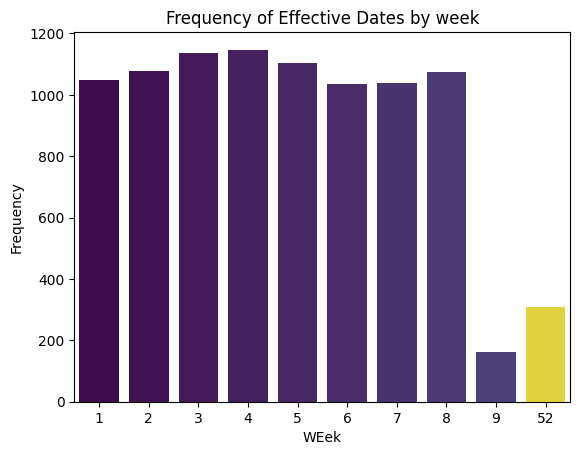

In [32]:
sns.countplot(data=categorical_df, x='week', hue = 'week',palette='viridis',legend=False)
plt.title('Frequency of Effective Dates by week')
plt.xlabel('WEek')
plt.ylabel('Frequency')
plt.show()

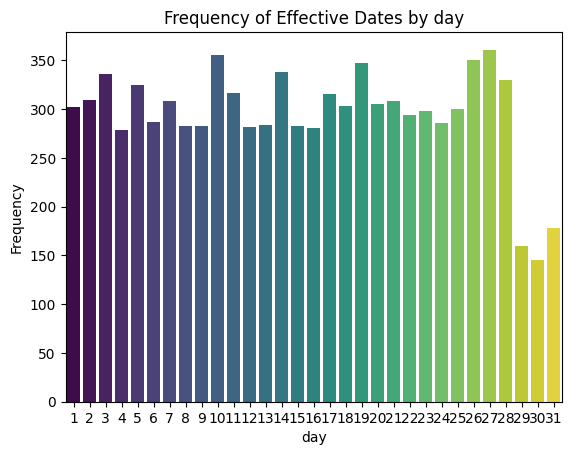

In [33]:
sns.countplot(data=categorical_df, x='day', hue = 'day',palette='viridis',legend=False)
plt.title('Frequency of Effective Dates by day')
plt.xlabel('day')
plt.ylabel('Frequency')
plt.show()

# ------------------------------------------------------------------------------------------------------


# Lab | Comparing regression models


For this lab, we will be using the same dataset we used in the previous labs. Load the cleaned categorical and numerical dataframes that you saved at the end of Monday's labs.

## Data Analysis Process
#### Remember the process:

- Case Study
- Get data
- Cleaning/Wrangling/EDA
- **Processing Data**
- **Modeling**
- **Validation**
- Reporting

### Instructions

Concatenate Numerical and Categorical dataframes into one dataframe called data. Split into X=features y=target (total_claim_amount).

1. In this final lab, we will model our data. Import sklearn `train_test_split` and separate the data.

2. Separate X_train and X_test into numerical and categorical (X_train_cat , X_train_num , X_test_cat , X_test_num)

3. Use X_train_num to fit scalers.  Transform BOTH X_train_num and X_test_num.

4. Encode the categorical variables X_train_cat and X_test_cat (See the hint below for encoding categorical data!!!)

5. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

# ***********************************************
## Hint for Categorical Variables

You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):
Encoder Type | Column 
-----------------|-----------------
One hot | state
Ordinal | coverage
Ordinal | employmentstatus
Ordinal | location code
One hot | marital status
One hot | policy type
One hot | policy
One hot | renew offercustomer_df
One hot | sales channel
One hot | vehicle class
Ordinal | vehicle size
Ordinal | education
One hot | response
One hot | gender

### Dummy code

data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})

given that column "coverage" in the dataframe "data" has three categories:

"basic", "extended", and "premium" values are to be represented in the same order.
# ******************************************************


6. Try a simple linear regression with all the data to see whether we are getting good results.

7. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

8. Use the function to check `LinearRegressor` and `KNeighborsRegressor`.

9. You can check also the `MLPRegressor` for this task!

10. Check and discuss the results.  

In [34]:
#Concatenate Numerical and Categorical dataframes into one dataframe called data. Split into X=features y=target (total_claim_amount).
final_df = pd.concat([numerical_df,categorical_df],axis=1)
final_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,week,month
0,2763.519279,56274,69,32,5,0,1,384.811147,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,L3,Offer1,Agent,Two-Door Car,Medsize,24,8,2
1,6979.535903,0,94,13,42,0,8,1131.464935,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,L3,Offer3,Agent,Four-Door Car,Medsize,31,5,1
2,12887.431650,48767,108,18,38,0,2,566.472247,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,L3,Offer1,Agent,Two-Door Car,Medsize,19,7,2
3,7645.861827,0,106,18,65,0,7,529.881344,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,L2,Offer1,Call Center,SUV,Medsize,20,3,1
4,2813.692575,43836,73,12,44,0,1,138.130879,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,L1,Offer1,Agent,Four-Door Car,Medsize,3,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,California,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Married,Personal Auto,L1,Offer2,Web,Four-Door Car,Medsize,10,6,2
9130,3096.511217,21604,79,14,28,0,1,379.200000,California,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,Corporate Auto,L3,Offer1,Branch,Four-Door Car,Medsize,12,6,2
9131,8163.890428,0,85,9,37,3,2,790.784983,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,Corporate Auto,L2,Offer1,Branch,Four-Door Car,Medsize,6,5,2
9132,7524.442436,21941,96,34,3,0,3,691.200000,California,No,Extended,College,2011-02-03,Employed,M,Suburban,Married,Personal Auto,L2,Offer3,Branch,Four-Door Car,Large,3,5,2


In [35]:
X = final_df.drop(['total_claim_amount'],axis =1)
y = final_df[['total_claim_amount']]
display(X,y)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,week,month
0,2763.519279,56274,69,32,5,0,1,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,L3,Offer1,Agent,Two-Door Car,Medsize,24,8,2
1,6979.535903,0,94,13,42,0,8,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,L3,Offer3,Agent,Four-Door Car,Medsize,31,5,1
2,12887.431650,48767,108,18,38,0,2,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,L3,Offer1,Agent,Two-Door Car,Medsize,19,7,2
3,7645.861827,0,106,18,65,0,7,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,L2,Offer1,Call Center,SUV,Medsize,20,3,1
4,2813.692575,43836,73,12,44,0,1,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,L1,Offer1,Agent,Four-Door Car,Medsize,3,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,California,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Married,Personal Auto,L1,Offer2,Web,Four-Door Car,Medsize,10,6,2
9130,3096.511217,21604,79,14,28,0,1,California,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,Corporate Auto,L3,Offer1,Branch,Four-Door Car,Medsize,12,6,2
9131,8163.890428,0,85,9,37,3,2,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,Corporate Auto,L2,Offer1,Branch,Four-Door Car,Medsize,6,5,2
9132,7524.442436,21941,96,34,3,0,3,California,No,Extended,College,2011-02-03,Employed,M,Suburban,Married,Personal Auto,L2,Offer3,Branch,Four-Door Car,Large,3,5,2


,total_claim_amount
0,384.811147
1,1131.464935
2,566.472247
3,529.881344
4,138.130879
...,...
9129,198.234764
9130,379.200000
9131,790.784983
9132,691.200000


In [36]:
#In this final lab, we will model our data. Import sklearn train_test_split and separate the data.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [37]:
# Separate X_train and X_test into numerical and categorical (X_train_cat , X_train_num , X_test_cat , X_test_num)
X_train_num = X_train.select_dtypes(include = 'number')
X_train_cat = X_train.select_dtypes(include = ['object','datetime64[ns]'])
X_test_num = X_test.select_dtypes(include = 'number')
X_test_cat = X_test.select_dtypes(include = ['object','datetime64[ns]'])

In [38]:
X_test_cat

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
831,Oregon,No,Basic,College,2011-02-06,Employed,F,Urban,Married,Personal Auto,L3,Offer1,Agent,Four-Door Car,Medsize
7359,California,No,Extended,High School or Below,2011-02-25,Employed,M,Rural,Single,Personal Auto,L3,Offer1,Agent,Four-Door Car,Medsize
2617,California,No,Extended,High School or Below,2011-01-18,Unemployed,F,Suburban,Single,Personal Auto,L3,Offer3,Agent,Two-Door Car,Small
3534,Arizona,Yes,Basic,College,2011-01-31,Employed,F,Suburban,Divorced,Personal Auto,L1,Offer2,Call Center,Four-Door Car,Medsize
4162,Nevada,No,Basic,College,2011-02-08,Employed,M,Suburban,Divorced,Personal Auto,L1,Offer1,Web,Two-Door Car,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6040,Oregon,No,Basic,High School or Below,2011-01-30,Unemployed,F,Suburban,Single,Personal Auto,L2,Offer1,Agent,Two-Door Car,Medsize
8702,California,No,Extended,High School or Below,2011-02-08,Employed,F,Urban,Married,Personal Auto,L2,Offer1,Call Center,SUV,Medsize
5575,Nevada,No,Basic,College,2011-02-18,Employed,M,Urban,Married,Special Auto,L3,Offer2,Web,Four-Door Car,Medsize
1133,Oregon,Yes,Extended,College,2011-02-13,Employed,F,Suburban,Married,Corporate Auto,L2,Offer1,Branch,Luxury Car,Small


In [39]:
#Use X_train_num to fit scalers. Transform BOTH X_train_num and X_test_num.
transformer = StandardScaler().fit(X_train_num)
X_train_num_standardized = transformer.transform(X_train_num)
X_test_num_standardized = transformer.transform(X_test_num)

In [40]:
Onehot_train = X_train_cat.loc[:,['state','marital_status','policy_type','policy','renew_offer_type','sales_channel','vehicle_class','response','gender']]
Onehot_test = X_test_cat.loc[:,['state','marital_status','policy_type','policy','renew_offer_type','sales_channel','vehicle_class','response','gender']]
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(Onehot_train)
X_train_cat_encoded = encoder.transform(Onehot_train).toarray()
X_test_cat_encoded = encoder.transform(Onehot_test).toarray()

In [41]:
X_train_cat['coverage'] = X_train_cat['coverage'].map({'Basic':0,'Extended':1,'Premium':2})
X_train_cat['employmentstatus'] = X_train_cat['employmentstatus'].map({'Medical Leave':0,'Disabled':1,'Unemployed':2,'Retired':3,'Employed':4})
X_train_cat['location_code'] = X_train_cat['location_code'].map({'Rural':0,'Suburban':1,'Urban':2})
X_train_cat['vehicle_size'] = X_train_cat['vehicle_size'].map({'Small':0,'Medsize':1,'Large':2})
X_train_cat['education'] = X_train_cat['education'].map({'High School or Below':0,'College':1,'Bachelor':2,'Master':3,'Doctor':4})

In [42]:
X_test_cat['coverage'] = X_test_cat['coverage'].map({'Basic':0,'Extended':1,'Premium':2})
X_test_cat['employmentstatus'] = X_test_cat['employmentstatus'].map({'Medical Leave':0,'Disabled':1,'Unemployed':2,'Retired':3,'Employed':4})
X_test_cat['location_code'] = X_test_cat['location_code'].map({'Rural':0,'Suburban':1,'Urban':2})
X_test_cat['vehicle_size'] = X_test_cat['vehicle_size'].map({'Small':0,'Medsize':1,'Large':2})
X_test_cat['education'] = X_test_cat['education'].map({'High School or Below':0,'College':1,'Bachelor':2,'Master':3,'Doctor':4})

In [43]:
X_train = np.concatenate((X_train_num_standardized,X_train_cat_encoded),axis=1)
X_train = np.concatenate((X_train,X_train_cat.loc[:,['coverage','employmentstatus','location_code','vehicle_size','education']].values),axis=1)
X_test = np.concatenate((X_test_num_standardized,X_test_cat_encoded,X_test_cat.loc[:,['coverage','employmentstatus','location_code','vehicle_size','education']].values),axis=1)


In [44]:
# Try a simple linear regression with all the data to see whether we are getting good results.
LR = LinearRegression().fit(X_train, y_train)

In [45]:
LR.score(X_train,y_train)

0.6218013174863299

In [46]:
LR.score(X_test,y_test)

0.6277204544541677

In [47]:
# Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.
def train_test_split_models(models,X_train,y_train,X_test,y_test):
    results = {}

    for model_name, model in models:
        # Train the model
        model.fit(X_train, y_train)

        # Test the model
        y_pred = model.predict(X_test)

        # score the model
        score = model.score(X_test,y_test)

        # Evaluate the model's performance
        mse = mean_squared_error(y_test, y_pred)

        # Store the results
        results[model_name] = score
        #print(f"{model_name}: Mean Squared Error = {mse:.4f}")

    return results

In [48]:
# Use the function to check LinearRegressor and KNeighborsRegressor.
regression_models = [('Linear Regression', LinearRegression()),('K Neighbors Regressor', KNeighborsRegressor())]
# Train and test the models
results_regression = train_test_split_models(regression_models, X_train, y_train, X_test, y_test)
for model_name, score in results_regression.items():
    print(f"{model_name}: Score = {score:.4f}")

Linear Regression: Score = 0.6277
K Neighbors Regressor: Score = 0.6283


In [49]:
# You can check also the MLPRegressor for this task!
mlp_regressor = MLPRegressor(max_iter=1000)
y_train_flattened = y_train.values.ravel()
y_test_flattened = y_test.values.ravel()
regression_model = [('MLP Regressor', mlp_regressor)]
results_regression = train_test_split_models(regression_model, X_train, y_train_flattened, X_test, y_test_flattened)
for model_name, score in results_regression.items():
    print(f"{model_name}: Score = {score:.4f}")

MLP Regressor: Score = 0.8164


C:\Users\H P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


# ------------------------------------------------------------------------------------

# Lab | Random variable distributions

Refer to the `numerical.csv` dataset that you previously saved.

### Instructions

1. Use the numerical variables from our dataset this week.
2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [50]:
# Use the numerical variables from our dataset this week.
num_df = pd.read_csv('numerical.csv')
num_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


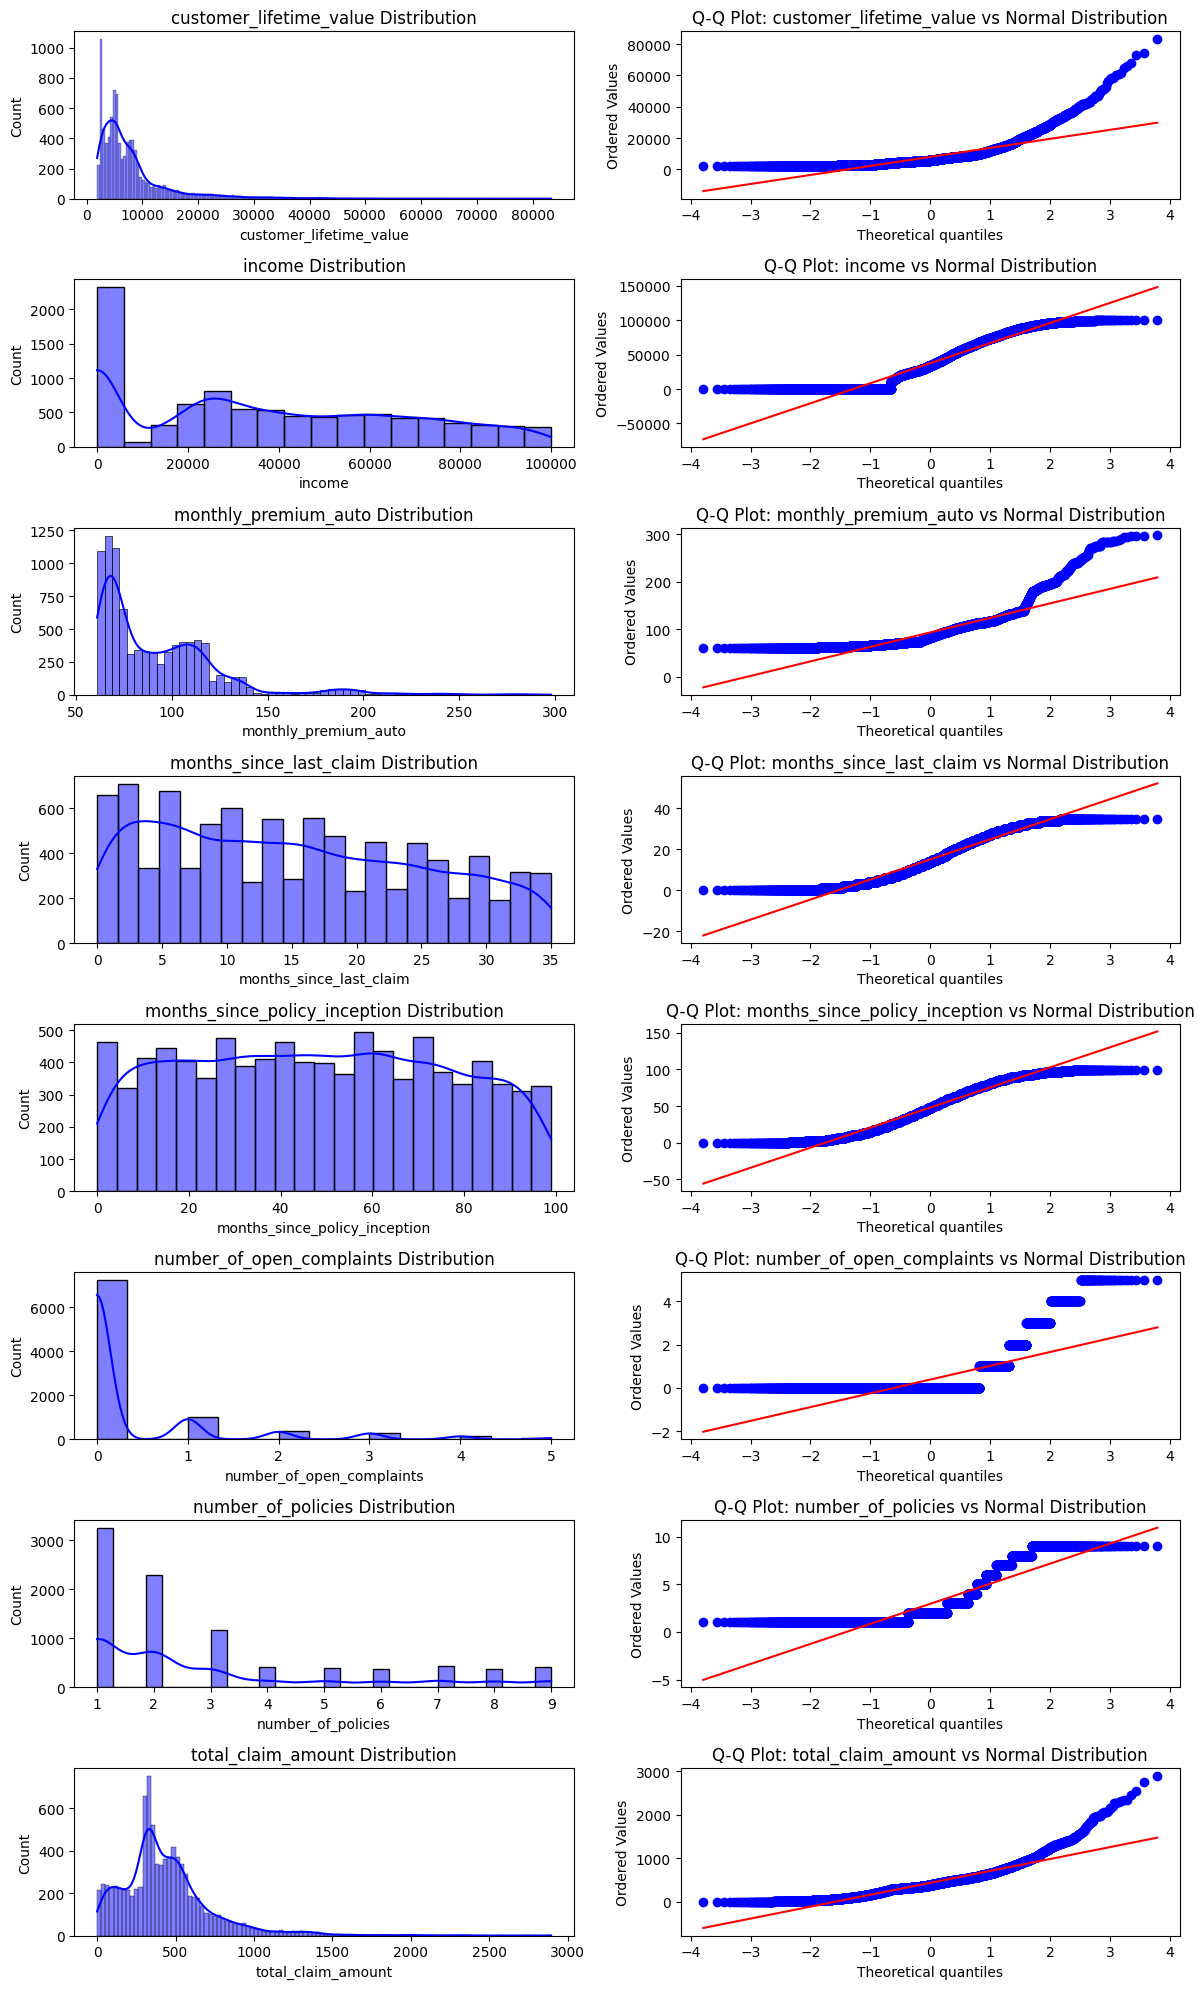

In [51]:
# Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
numerical_columns = num_df.columns
fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(12, 20))
for i, col in enumerate(numerical_columns):
    sns.histplot(num_df[col], kde=True, ax=axes[i, 0], color='blue')
    axes[i, 0].set_title(f'{col} Distribution')
    probplot(num_df[col], dist="norm", plot=axes[i, 1])
    axes[i, 1].set_title(f'Q-Q Plot: {col} vs Normal Distribution')

plt.tight_layout()
plt.show()

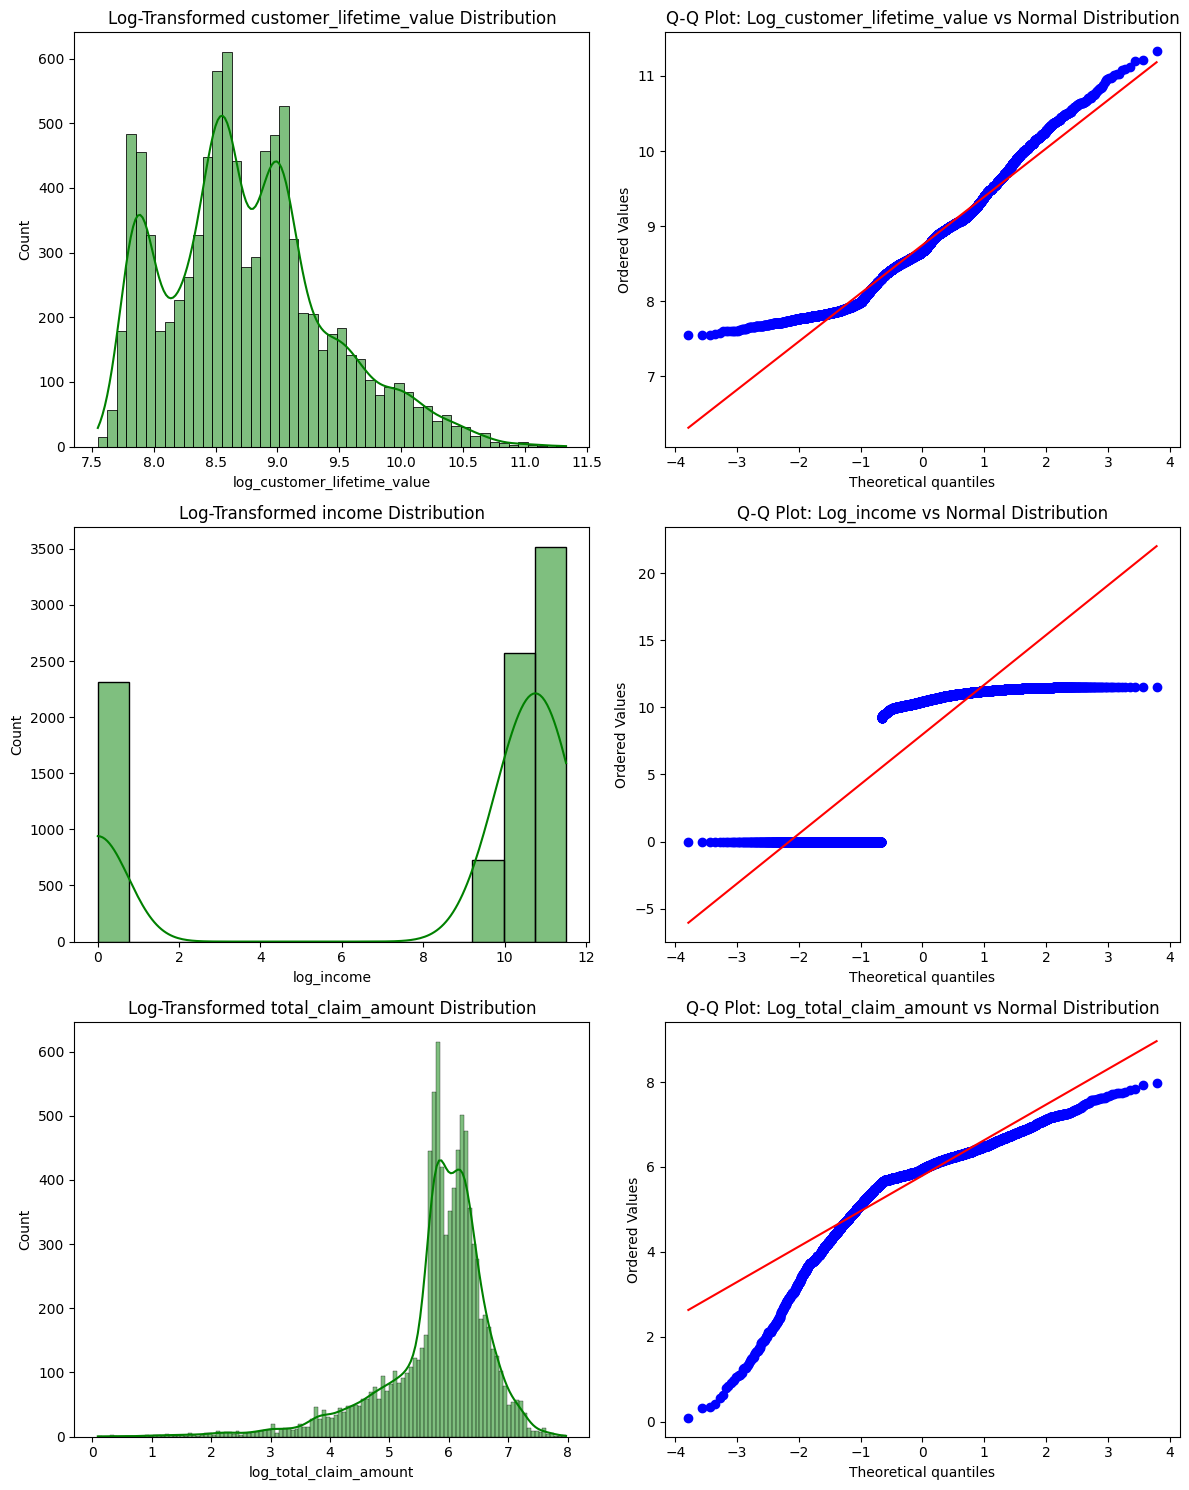

In [52]:
# Apply log transformation and re-check distributions (if needed)
log_transformed_cols = ['customer_lifetime_value', 'income', 'total_claim_amount']
for col in log_transformed_cols:
    num_df[f'log_{col}'] = np.log(num_df[col] + 1)

# Plot the transformed distributions
fig, axes = plt.subplots(len(log_transformed_cols), 2, figsize=(12, 15))
for i, col in enumerate(log_transformed_cols):
    sns.histplot(num_df[f'log_{col}'], kde=True, ax=axes[i, 0], color='green')
    axes[i, 0].set_title(f'Log-Transformed {col} Distribution')
    probplot(num_df[f'log_{col}'], dist="norm", plot=axes[i, 1])
    axes[i, 1].set_title(f'Q-Q Plot: Log_{col} vs Normal Distribution')

plt.tight_layout()
plt.show()